# LAB 2



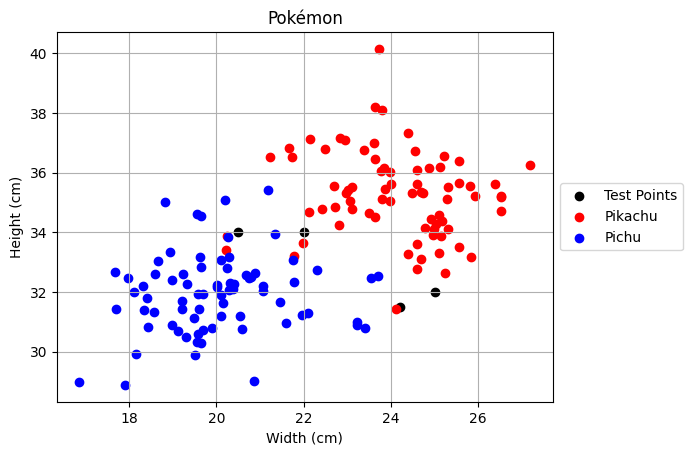

(25.0, 32.0) is classified as Pikachu
(25.0, 32.0) is classified as Pikachu (10 closest)
(24.2, 31.5) is classified as Pikachu
(24.2, 31.5) is classified as Pichu (10 closest)
(22.0, 34.0) is classified as Pikachu
(22.0, 34.0) is classified as Pikachu (10 closest)
(20.5, 34.0) is classified as Pichu
(20.5, 34.0) is classified as Pichu (10 closest)
(20.240420339246214, 33.87654102727224) is classified as Pikachu
(20.240420339246214, 33.87654102727224) is classified as Pichu (10 closest)


In [21]:
import matplotlib.pyplot as plt
import csv
import math

file_path = "/Users/kevin/Documents/Github/Python-Kevin-Fu/Labs-Explorations/data/datapoints.csv"
test_path = "/Users/kevin/Documents/Github/Python-Kevin-Fu/Labs-Explorations/data/testpoints.csv"

width, height,labels = [], [], []

def classify_pokemon(data_width, data_height):
    
    closest_distance = float("inf")
    closest_label = None
    
    for i in range(len(width)):
        distance = math.sqrt((data_width - width[i]) ** 2 + (data_height - height[i]) ** 2)
        
        if distance < closest_distance:
            closest_distance = distance
            closest_label = labels[i]

    if closest_label == 1:
        classification = "Pikachu"
    else:
        classification = "Pichu"

    print(f"({data_width}, {data_height}) is classified as {classification}")

def classify_pokemon_ten_closest(data_width, data_height, k=10):
    
    distances = []
    
    for i in range(len(width)):
        distance = math.sqrt((data_width - width[i]) ** 2 + (data_height - height[i]) ** 2)
        distances.append((distance, labels[i]))
    
    
    closest_points = sorted(distances)[:k]
    pikachu_count = sum(1 for _, label in closest_points if label == 1)
    pichu_count = k - pikachu_count
  
    if pikachu_count > pichu_count:
        classification = "Pikachu"
    else:
        classification = "Pichu"

    print(f"({data_width}, {data_height}) is classified as {classification} (10 closest)")

#check non-numeric and non-positive input
def check_input(user):
   
    while True:
        try:
            value = float(input(user))
            if value >= 0:
                return value
            else:
                print("Please enter a positive number.")
        except ValueError:
            print("Please enter a number.")

def user_points():
    
    user_width = check_input("Enter width(cm): ")
    user_height = check_input("Enter height(cm): ")
    classify_pokemon(user_width,user_height)
    classify_pokemon_ten_closest(user_width,user_height)

def get_data():
    
    with open(file_path, newline="") as file:
        reader = csv.reader(file)
        #skip header
        
        next(reader, None)
        
        for row in reader:
            width.append(float(row[0]))
            height.append(float(row[1]))
            labels.append(int(row[2]))

#remove unwanted parentheses and ordered list 
def read_data():

    with open(test_path, "r") as file:
        for line in file:
            
            if "." in line and "(" in line and ")" in line:
            
                parts = line.split("(")[1]
                parts = parts.split(")")[0]
                parts = parts.split(",")
                test_width = float(parts[0])
                test_height = float(parts[1])

                classify_pokemon(test_width, test_height)
                classify_pokemon_ten_closest(test_width,test_height)

        
def graph():
    
    x_pikachu = [width[i] for i in range(len(width)) if labels[i] == 1]
    y_pikachu = [height[i] for i in range(len(height)) if labels[i] == 1]
    
    x_pichu = [width[i] for i in range(len(width)) if labels[i] == 0]
    y_pichu = [height[i] for i in range(len(height)) if labels[i] == 0]
    
    test_points = [(25, 32), (24.2, 31.5), (22, 34), (20.5, 34)]
    test_width, test_height = zip(*test_points)
    plt.scatter(
        test_width, test_height,
        color="black",  
        label="Test Points"
    )

    plt.scatter(x_pikachu, y_pikachu, color="red", label="Pikachu")
    plt.scatter(x_pichu, y_pichu, color="blue", label="Pichu")
    
    plt.xlabel("Width (cm)")    
    plt.ylabel("Height (cm)")
    plt.title("Pokémon")
    plt.legend(loc="center left", bbox_to_anchor=(1, 0.5))
    plt.grid()
    
    plt.show()

def main():
    
    get_data()
    graph()
    read_data()
    user_points()

if __name__ == "__main__":
    
    main()

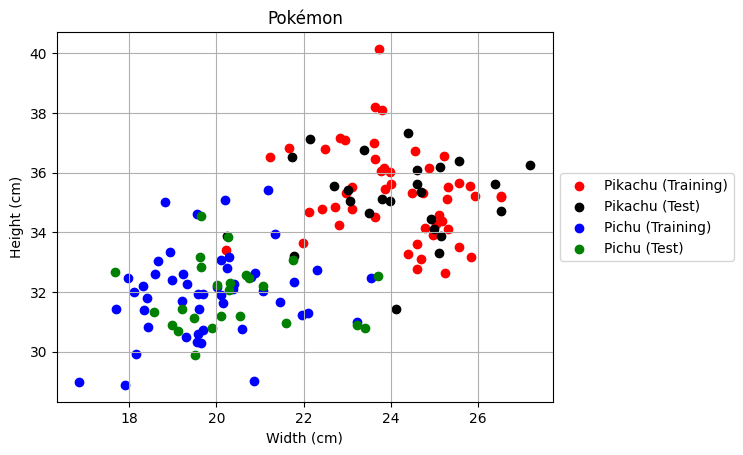

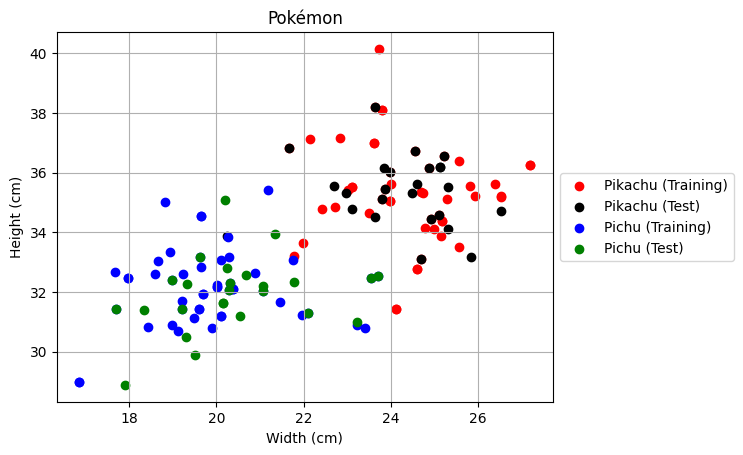

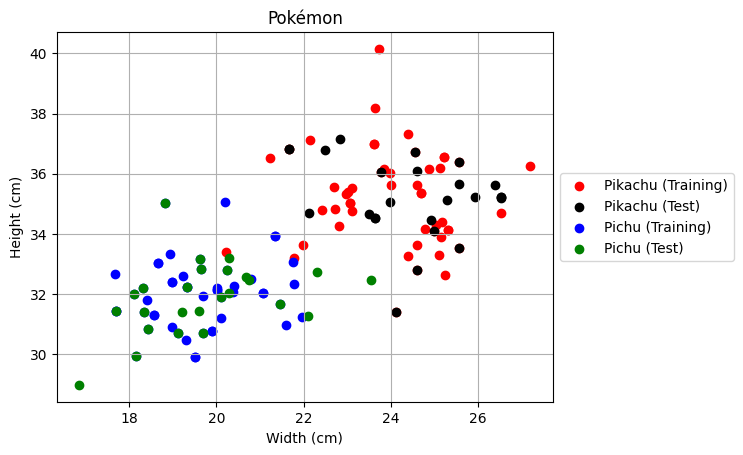

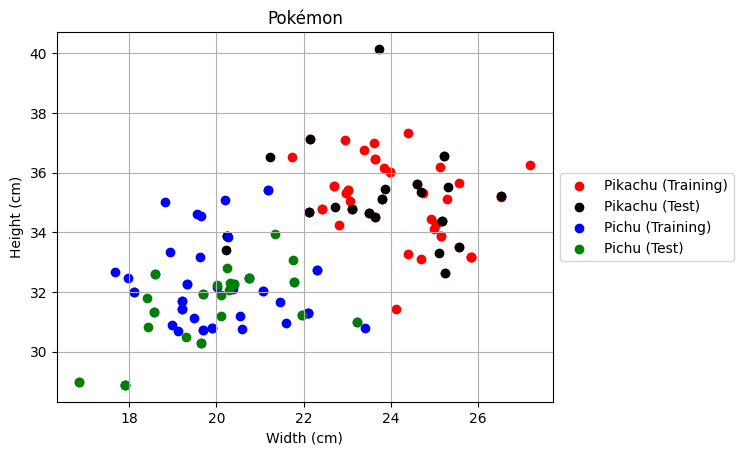

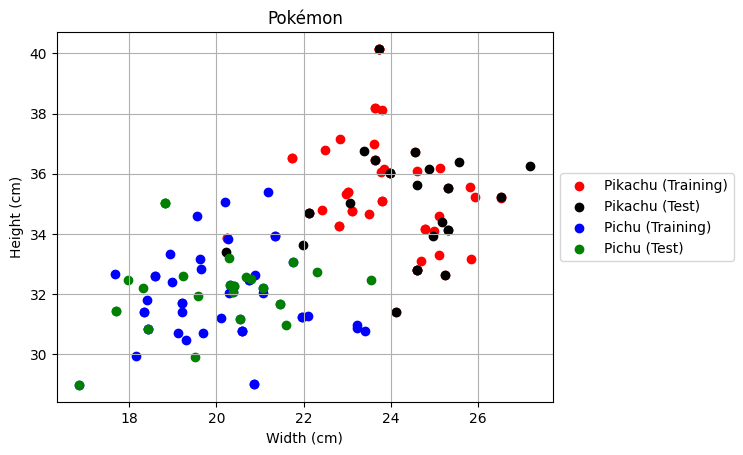

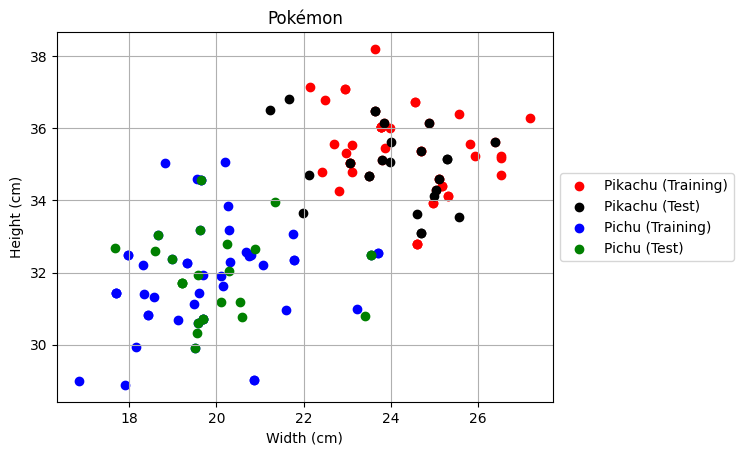

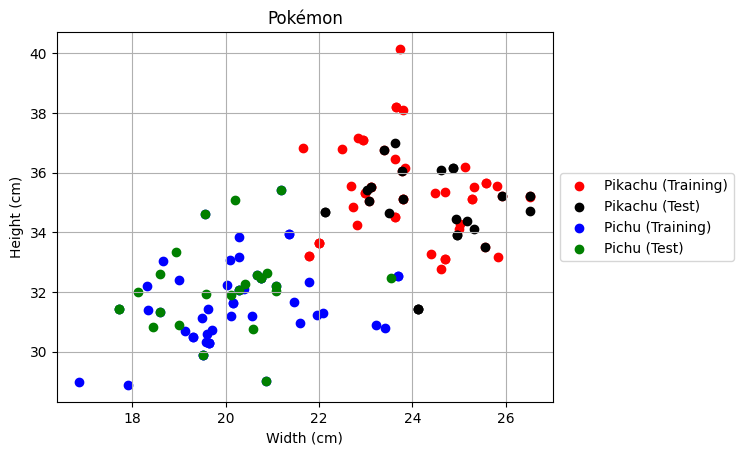

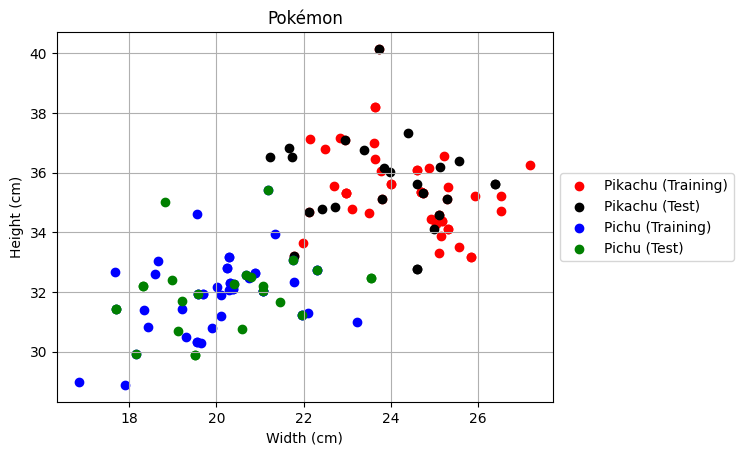

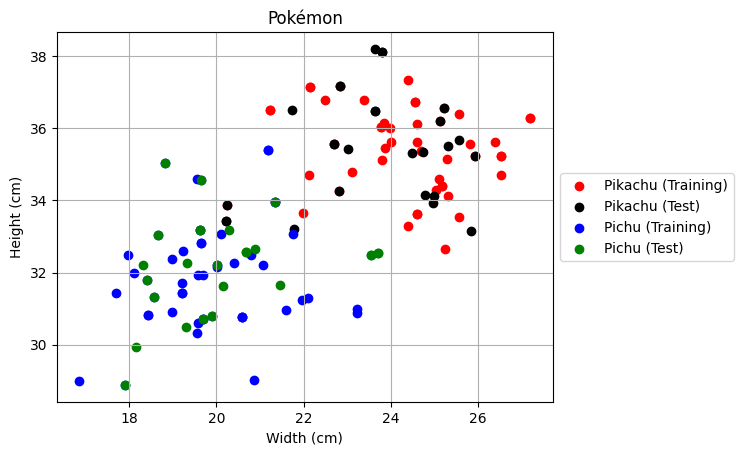

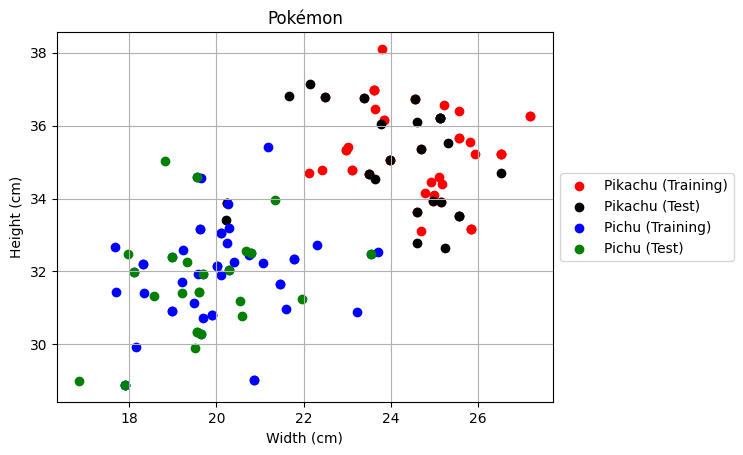

Average accuracy over 10 tests: 97%


In [23]:
import csv
import random
import matplotlib.pyplot as plt
import math

file_path = "/Users/kevin/Documents/Github/Python-Kevin-Fu/Labs-Explorations/data/datapoints.csv"

widths, heights, labels = [], [], []

def load_data(file_path):
    

    with open(file_path, newline="") as file:
        reader = csv.reader(file)
        
        # Skip header
        next(reader, None) 
        
        for row in reader:
            widths.append(float(row[0]))
            heights.append(float(row[1]))
            labels.append(int(row[2]))
    
    return widths, heights, labels

#split data to test and training data
def split_data(widths, heights, labels):
    
    pikachu_data, pichu_data = [], []
    
    #"zip" combines (width, height, labels) into one seprate list.
    for width, height, label in zip(widths, heights, labels):
        if label == 1:
            pikachu_data.append((width, height, label))
        elif label == 0:
            pichu_data.append((width, height, label))

    random.shuffle(pikachu_data)
    random.shuffle(pichu_data)

    test_data = pikachu_data[:25] + pichu_data[:25]
    training_data = pikachu_data[25:75] + pichu_data[25:75]
    
    return training_data, test_data

#use majoriity vote to check pokemon
def classify_pokemon_ten_closest(data_width, data_height, k=10):
    
    distances = []
    
    for i in range(len(widths)):
        distance = math.sqrt((data_width - widths[i]) ** 2 + (data_height - heights[i]) ** 2)
        distances.append((distance, labels[i]))
    
    # Sort the list so the closest pokemon come first
    closest_points = sorted(distances)[:k]
    pikachu_count = sum(1 for i, label in closest_points if label == 1)
    pichu_count = k - pikachu_count
  
    if pikachu_count > pichu_count:
        classification = 1
    else:
        classification = 0
    
    return classification
    
def calculate_accuracy(test_data):
    
    true_positives, true_negatives, total = 0, 0, len(test_data)

    for data in test_data:
        actual_label = data[2]
        predicted_label = classify_pokemon_ten_closest(data[0],data[1])

        if actual_label == 1 and predicted_label == 1:
            true_positives += 1
        elif actual_label == 0 and predicted_label == 0:
            true_negatives += 1

    accuracy = (true_positives + true_negatives) / total
    
    return accuracy

# Using training and test data to create scatter plots
def graph(training_data, test_data):
    
    x_pikachu_train = [point[0] for point in training_data if point[2] == 1]
    y_pikachu_train = [point[1] for point in training_data if point[2] == 1]

    x_pikachu_test = [point[0] for point in test_data if point[2] == 1]
    y_pikachu_test = [point[1] for point in test_data if point[2] == 1]

    x_pichu_train = [point[0] for point in training_data if point[2] == 0]
    y_pichu_train = [point[1] for point in training_data if point[2] == 0]

    x_pichu_test = [point[0] for point in test_data if point[2] == 0]
    y_pichu_test = [point[1] for point in test_data if point[2] == 0]

   
    plt.scatter(x_pikachu_train, y_pikachu_train, color="red", label="Pikachu (Training)")
    plt.scatter(x_pikachu_test, y_pikachu_test, color="black", label="Pikachu (Test)")
    plt.scatter(x_pichu_train, y_pichu_train, color="blue", label="Pichu (Training)")
    plt.scatter(x_pichu_test, y_pichu_test, color="green", label="Pichu (Test)")

    plt.xlabel("Width (cm)")
    plt.ylabel("Height (cm)")
    plt.title("Pokémon")
    plt.grid()
    plt.legend(loc="center left", bbox_to_anchor=(1, 0.5))

    plt.show()
   

def main():
     
    num_tests = 10
    total_accuracy = 0

    for i in range(num_tests):
       
        training_data = []
        test_data = []
        widths, heights, labels = [], [], []
        widths, heights, labels = load_data(file_path)
        training_data, test_data = split_data(widths, heights, labels)
        accuracy = calculate_accuracy(test_data)
        total_accuracy += accuracy
        graph(training_data, test_data)
        

    # calculates and prints the average accuracy over 10 tests
    average_accuracy = total_accuracy / num_tests
    print(f"Average accuracy over {num_tests} tests: {average_accuracy:.0%}")


if __name__ == "__main__":
    
    main()


